# 5.1 Generating Barabási-Albert (BA) networks

Write code to generate a network with N = 104 nodes using the BA model with
m = 4. Use as initial condition a fully connected network with m = 4 nodes.

In [3]:
# imports

import networkx as nx
import random 
import numpy as np
import pandas as pd
from tqdm import tqdm
import powerlaw
from matplotlib import pyplot as plt
import matplotlib; matplotlib.rcParams["figure.dpi"] = 100
import warnings

We perform the setup described above

In [9]:
alphas = []
n = 10 ** 4
N = {i : [j for j in range(1, 5)] for i in range(1, 5)}
D = []
random.seed(42)

for node in tqdm(range(5, n + 1)):
    samples = [k for k in N.keys()]
    weights = [len(v) for v in N.values()]
    choices = random.choices(samples, weights, k=4)
    N[node] = choices
    for choice in choices:
        N[choice].append(node)
    if node in (10 ** 2, 10 ** 3, 10 ** 4):
        D.append([len(v) for v in N.values()])


100%|██████████| 9996/9996 [00:06<00:00, 1618.71it/s]


## 5.1.1

Measure the degree distribution at intermediate steps, namely when the network
has 10^2, 10^3 and 10^4 nodes.

In [10]:
for i in range(len(D)):
    df = pd.DataFrame(D[i])
    print(df.describe())

                0
count  100.000000
mean     7.840000
std      6.536177
min      4.000000
25%      4.000000
50%      5.500000
75%      8.000000
max     40.000000
                0
count  1000.00000
mean      7.98400
std       8.98713
min       4.00000
25%       4.00000
50%       5.00000
75%       8.00000
max     115.00000
                  0
count  10000.000000
mean       7.998400
std       11.113575
min        4.000000
25%        4.000000
50%        5.000000
75%        8.000000
max      362.000000


## 5.1.2

Compare the distributions at these intermediate steps by plotting them together
and fitting each to a power-law with degree exponent γ. Do the distributions
“converge”? Do you find the exponent you would expect?

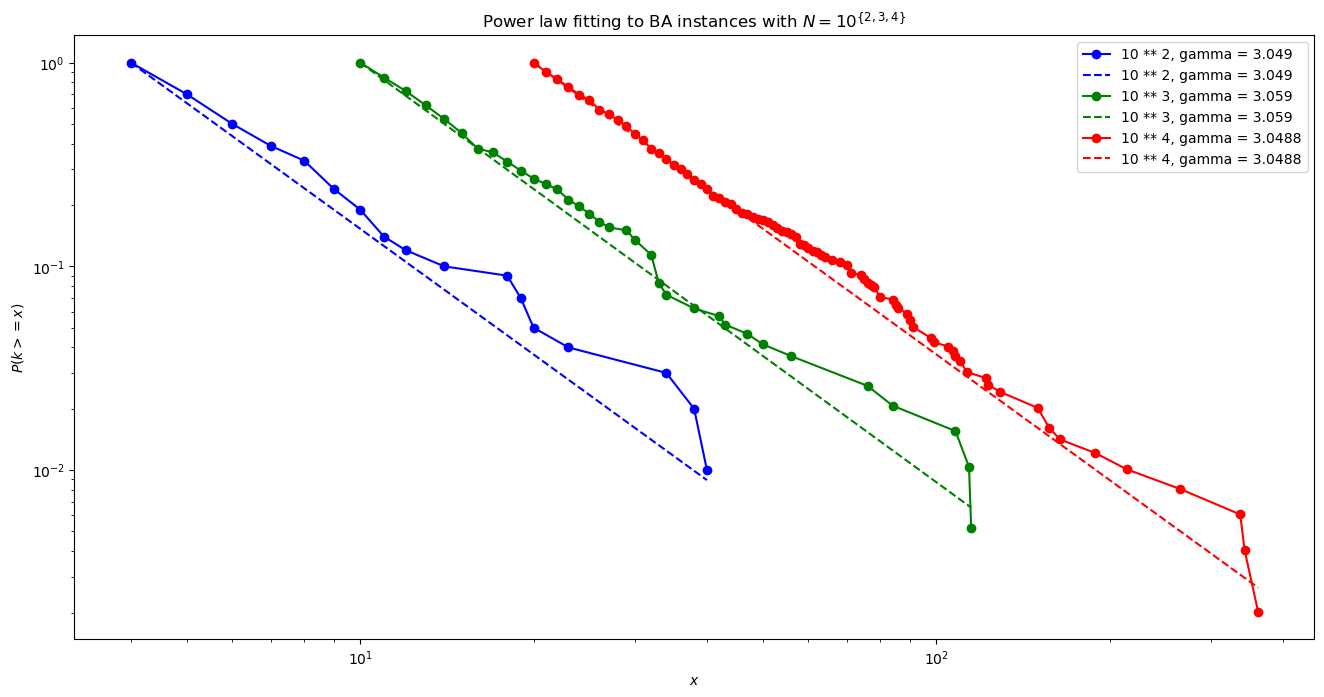

In [16]:
# 5.1.2

fig, axis = plt.subplots(1, 1, figsize=(16, 8))
warnings.filterwarnings("ignore")
colors = ['r', 'g', 'b'][::-1]
labels = ['10 ** 2', '10 ** 3', '10 ** 4']
for i in range(len(D)):
    # frq = [d / max(D[i]) for d in D[i]]
    frq = D[i]
    fit = powerlaw.Fit(frq, ax=axis, verbose=False)
    fit.plot_ccdf(ax=axis, marker='o', color=colors[i], label=f'{labels[i]}, gamma = {round(fit.alpha, 4)}')
    fit.power_law.plot_ccdf(ax=axis, linestyle='--', color=colors[i], label=f'{labels[i]}, gamma = {round(fit.alpha, 4)}')
    alphas.append(fit.alpha)
plt.title('Power law fitting to BA instances with $N = 10^{\{2, 3, 4\}}$')
plt.xlabel(r'$x$'); plt.ylabel(r'$P(k >= x)$'); plt.legend()
plt.show()

The above plot is as we would expect, with each line bein of set by one order of magnitude, and paralel to one another. As for problem 4.3, `powerlaw` slightly overestimates $\gamma$.

In [14]:
print([round(gamma, 5) for gamma in alphas]) # alphas are all around 3, as expected

[3.04896, 3.05895, 3.04877, 3.04896, 3.05895, 3.04877]
